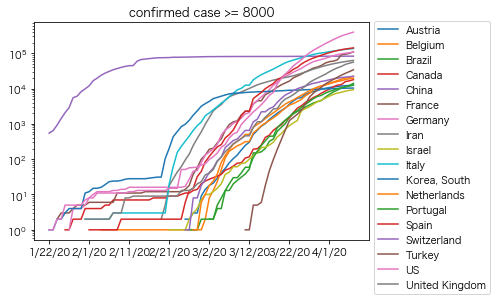

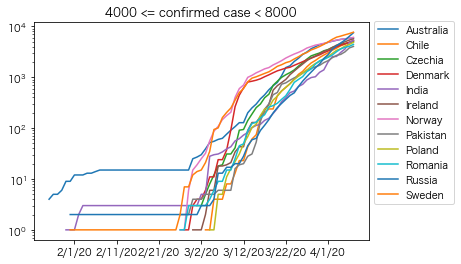

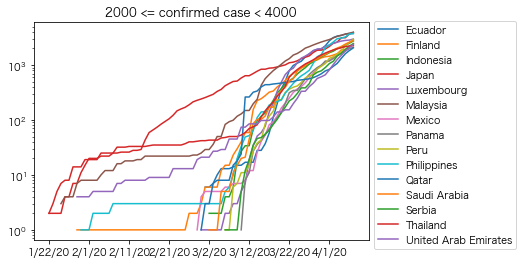

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df.drop(columns=["Lat", "Long"])

country_df = df.groupby("Country/Region").sum()
country_df = country_df.drop(["Diamond Princess"])
country_df = country_df.replace(0, np.nan)
last_date = country_df.columns[-1]

thresh1 = 8000
thresh2 = 4000
thresh3 = 2000

t = country_df[(country_df[last_date] >= thresh1)].T
t.plot(logy=True, title='confirmed case >= {}'.format(thresh1)).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

t = country_df[(country_df[last_date] >= thresh2) & (country_df[last_date] < thresh1)].T
t.plot(logy=True, title='{} <= confirmed case < {}'.format(thresh2, thresh1)).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

t = country_df[(country_df[last_date] >= thresh3) & (country_df[last_date] < thresh2)].T
t.plot(logy=True, title='{} <= confirmed case < {}'.format(thresh3, thresh2)).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

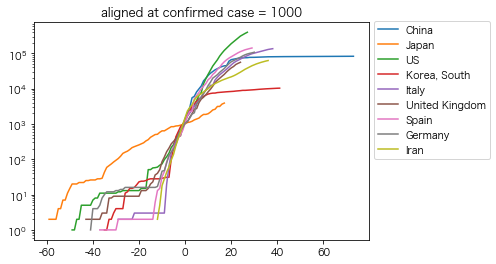

In [2]:
def align_time_series(input_df, level=100):
    last_date = input_df.columns[-1]
    input_df = input_df[(input_df[last_date] > level)]
    index_shift = {}
    for i, country in enumerate(input_df.index):
        for j, date in enumerate(input_df.columns):
            if input_df.iat[i, j] >= level:
                index_shift[i] = j
                break
    num_columns = len(input_df.columns)
    aligned_df = pd.DataFrame(index=input_df.index, columns=range(-num_columns, num_columns))
    for i, country in enumerate(input_df.index):
        for j, date in enumerate(input_df.columns):
            if input_df.iat[i, j] > 0:
                aligned_df.at[country, j-index_shift[i]] = input_df.iat[i, j]
    return aligned_df

#countries = country_df[country_df[last_date]>=level].index
countries = ["China", "Japan", "US", "Korea, South", "Italy", "United Kingdom", "Spain", "Germany", "Iran"]
selected_df = country_df.loc[countries, :]

level = 1000
aligned_df = align_time_series(selected_df, level)

t = aligned_df.T
t.plot(logy=True, title='aligned at confirmed case = {}'.format(level)).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

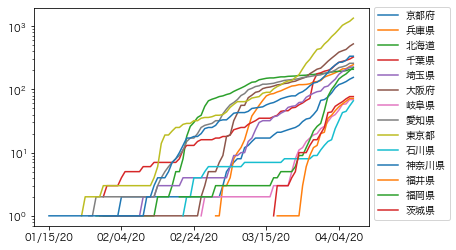

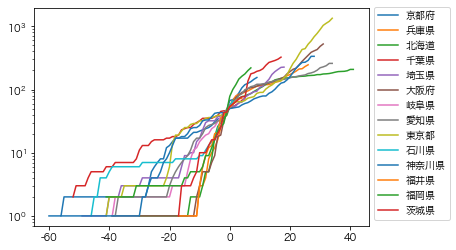

In [3]:
japan_df = pd.read_csv('https://raw.githubusercontent.com/fukudat007/covid19/master/data/time_series_confirmed_japan.csv')
japan_df = japan_df.drop(columns=["Lat", "Long"])
japan_df = japan_df.groupby("Prefecture").sum()
japan_df = japan_df.replace(0, np.nan)

last_date = japan_df.columns[-1]

level=50

t = japan_df[(japan_df[last_date] >= level)].T
t.plot(logy=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

aligned_df = align_time_series(japan_df, level)
t = aligned_df.T
t.plot(logy=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')